In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('drive/My Drive/so22.csv')
data

,TimeStamp,3207010,33204020,29209010,33202110,14104030,8344010,43202020,34202020,28209010,...,23211040,12201160,11222020,15201150,27201030,20202050,5203020,34207090,27210010,44214010
0,2018-01-01 00:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
1,2018-01-01 01:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
2,2018-01-01 02:00:00,0.000,0.005,0.003,0.003,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.000,0.001,0.0,0.003
3,2018-01-01 03:00:00,0.000,0.007,0.002,0.004,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.001,0.001,0.0,0.003
4,2018-01-01 04:00:00,0.000,0.004,0.002,0.003,0.004,0.0,0.001,0.001,0.001,...,0.000,0.000,0.000,0.000,0.004,0.003,0.001,0.001,0.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,2023-10-31 19:00:00,0.001,0.001,0.001,0.006,0.003,0.0,0.001,0.001,0.001,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51116,2023-10-31 20:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.000,0.000,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51117,2023-10-31 21:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.001,0.001,...,0.000,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51118,2023-10-31 22:00:00,0.001,0.001,0.000,0.003,0.004,0.0,0.000,0.001,0.001,...,0.000,0.001,0.001,0.000,NaN,0.000,0.000,0.000,NaN,0.002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('drive/My Drive/so22.csv',dtype=str)

In [ ]:
data.replace(['None',''],np.nan,inplace=True)

In [ ]:
selected_column='33204020'

In [ ]:
train_data,test_data=train_test_split(data[selected_column],test_size=0.2,shuffle=False)

In [ ]:
def create_dataset(dataset,time_steps=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_steps-1):
    a=dataset[i:(i+time_steps)]
    dataX.append(a)
    dataY.append(dataset[i+time_steps])
  return np.array(dataX,dtype=float),np.array(dataY,dtype=float)

In [ ]:
time_steps=10
X_train,y_train=create_dataset(train_data.values.squeeze(),time_steps)
X_test,y_test=create_dataset(test_data.values.squeeze(),time_steps)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_steps,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=2)
predictions=model.predict(X_test)

Epoch 1/10
1278/1278 - 14s - loss: 2.5912e-06 - 14s/epoch - 11ms/step
Epoch 2/10
1278/1278 - 14s - loss: 2.5819e-06 - 14s/epoch - 11ms/step
Epoch 3/10
1278/1278 - 14s - loss: 2.5549e-06 - 14s/epoch - 11ms/step
Epoch 4/10
1278/1278 - 14s - loss: 2.5519e-06 - 14s/epoch - 11ms/step
Epoch 5/10
1278/1278 - 14s - loss: 2.5779e-06 - 14s/epoch - 11ms/step
Epoch 6/10
1278/1278 - 13s - loss: 2.5681e-06 - 13s/epoch - 10ms/step
Epoch 7/10
1278/1278 - 13s - loss: 2.5513e-06 - 13s/epoch - 10ms/step
Epoch 8/10
1278/1278 - 13s - loss: 2.5688e-06 - 13s/epoch - 10ms/step
Epoch 9/10
1278/1278 - 13s - loss: 2.5640e-06 - 13s/epoch - 10ms/step
Epoch 10/10
1278/1278 - 14s - loss: 2.5577e-06 - 14s/epoch - 11ms/step
320/320 [==============================] - 2s 4ms/step


RMSE: 0.0017705523441756909


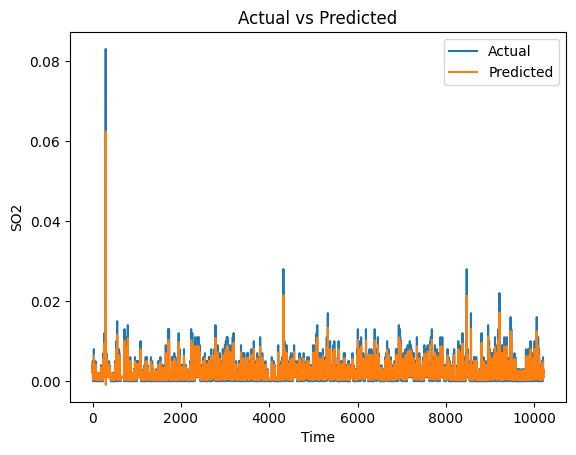

In [ ]:
if np.isnan(y_test).any() or np.isnan(predictions).any():
  print("Error: input data contains NaN values.")
else:
  mse=mean_squared_error(y_test,predictions)
  rmse=sqrt(mse)
  print("RMSE:",rmse)
  plt.plot(y_test,label='Actual')
  plt.plot(predictions,label='Predicted')
  plt.legend()
  plt.title('Actual vs Predicted')
  plt.xlabel('Time')
  plt.ylabel('SO2')
  plt.show()